In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("hls")

## Calculating X Perplexity

#### training dataset

In [17]:
df = pd.read_csv('perp_data/train_x_perp.csv')
df['X_PERPLEXITY'] = (500 - df.sum(axis=1))/500
df = df.iloc[:,500::]
df.columns = ['PATH','X_PERPLEXITY']
df.to_csv('perp_data/TRAIN_PATH_XPERPLEXITY.csv',index=None)

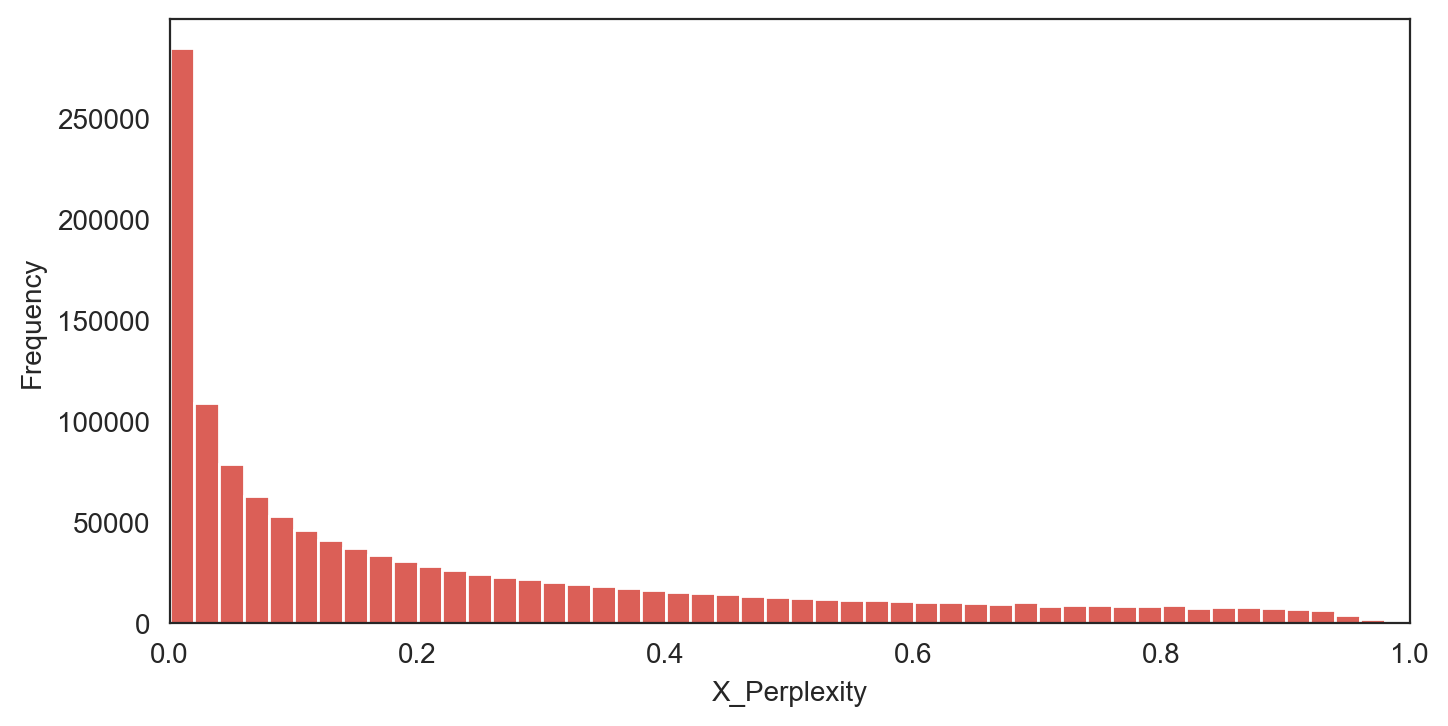

In [18]:
plt.figure(figsize=[8,4],dpi=200)
plt.hist(df['X_PERPLEXITY'],bins=50)
plt.ylabel('Frequency')
plt.xlabel('X_Perplexity')
plt.xlim([0,1])
plt.savefig('img/TRAIN_X_PERPLEXITY.png',dpi=200)

#### Validation dataset

In [2]:
df = pd.read_csv('perp_data/perplexity.csv').loc[:,['filename','x_perplexity']]
df.columns = ['PATH','X_PERPLEXITY']
df.to_csv('perp_data/VAL_PATH_XPERPLEXITY.csv',index=None)

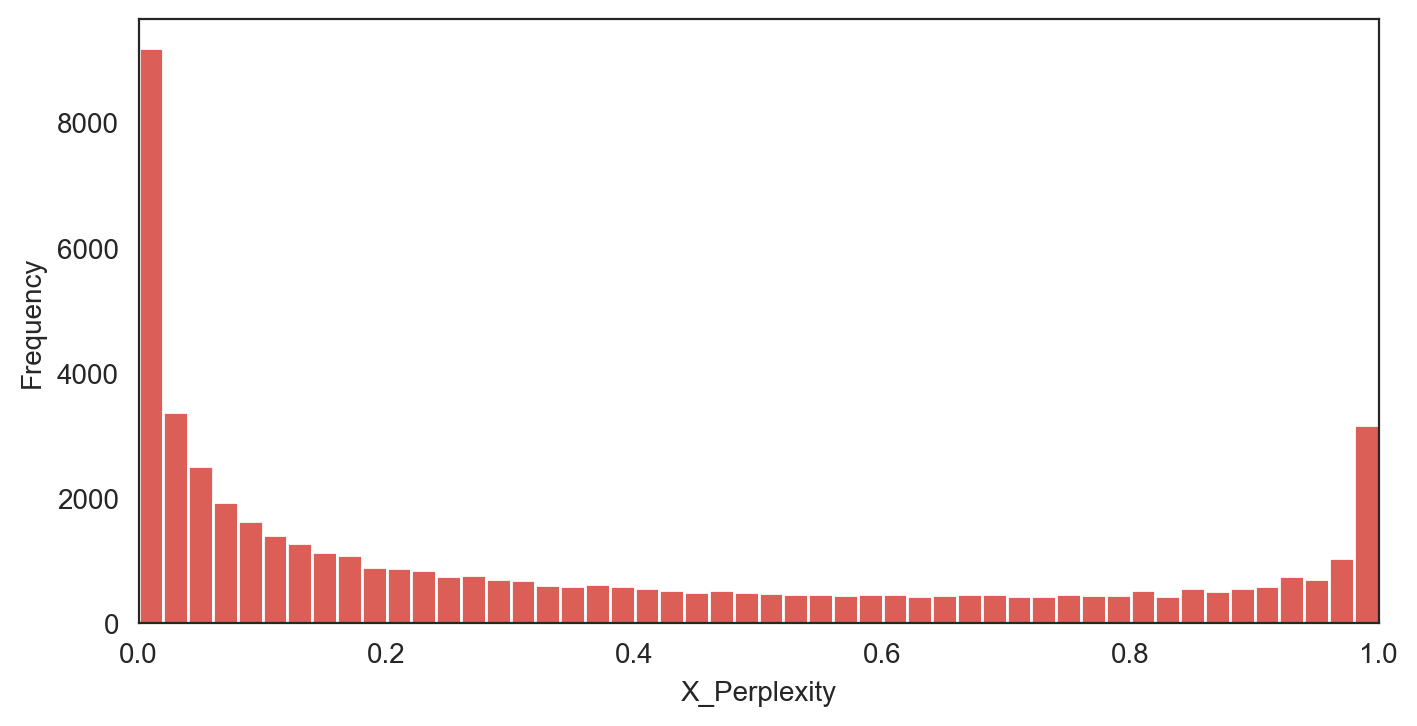

In [11]:
plt.figure(figsize=[8,4],dpi=200)
plt.hist(df['X_PERPLEXITY'],bins=50)
plt.ylabel('Frequency')
plt.xlabel('X_Perplexity')
plt.xlim([0,1])
plt.savefig('img/VAL_X_PERPLEXITY.png',dpi=200)

## Calculating C-Perplexity

#### Training Dataset

In [3]:
C_PERPLEXITY,PATH = [],[]
def foo(x):
    return np.power(x,1/500)
for df in pd.read_csv('perp_data/train_c_perp.csv',chunksize=100000):
    PATH.extend(df['path'])
    C_PERPLEXITY.extend(df.iloc[:,0:500].apply(foo).product(axis=1))

In [4]:
df = pd.DataFrame({'PATH':PATH,'C_PERPLEXITY':C_PERPLEXITY})
df.to_csv('perp_data/TRAIN_PATH_CPERPLEXITY.csv',index=None)

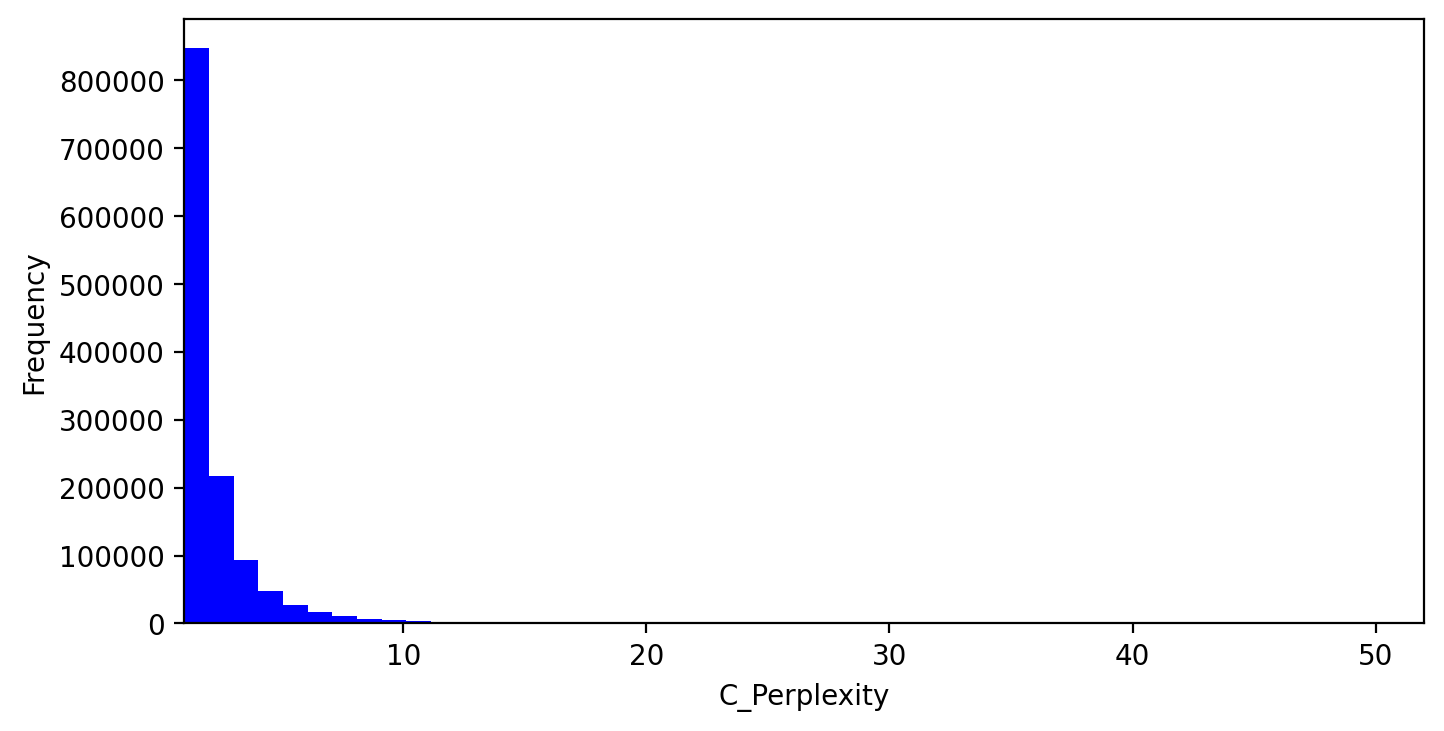

In [11]:
fig = plt.figure(figsize=[8,4],dpi=200)
fig.patch.set_facecolor('#FFFFFF')
plt.hist(df['C_PERPLEXITY'],color='b',bins=50)
plt.ylabel('Frequency')
plt.xlabel('C_Perplexity')
plt.xlim([1,52])
plt.savefig('img/TRAIN_C_PERPLEXITY.png',facecolor=fig.get_facecolor(),dpi=200)

#### Validation dataset

In [15]:
df = pd.read_csv('perp_data/perplexity.csv').loc[:,['filename','c_perplexity']]
df.columns = ['PATH','C_PERPLEXITY']
df.to_csv('perp_data/VAL_PATH_CPERPLEXITY.csv',index=None)

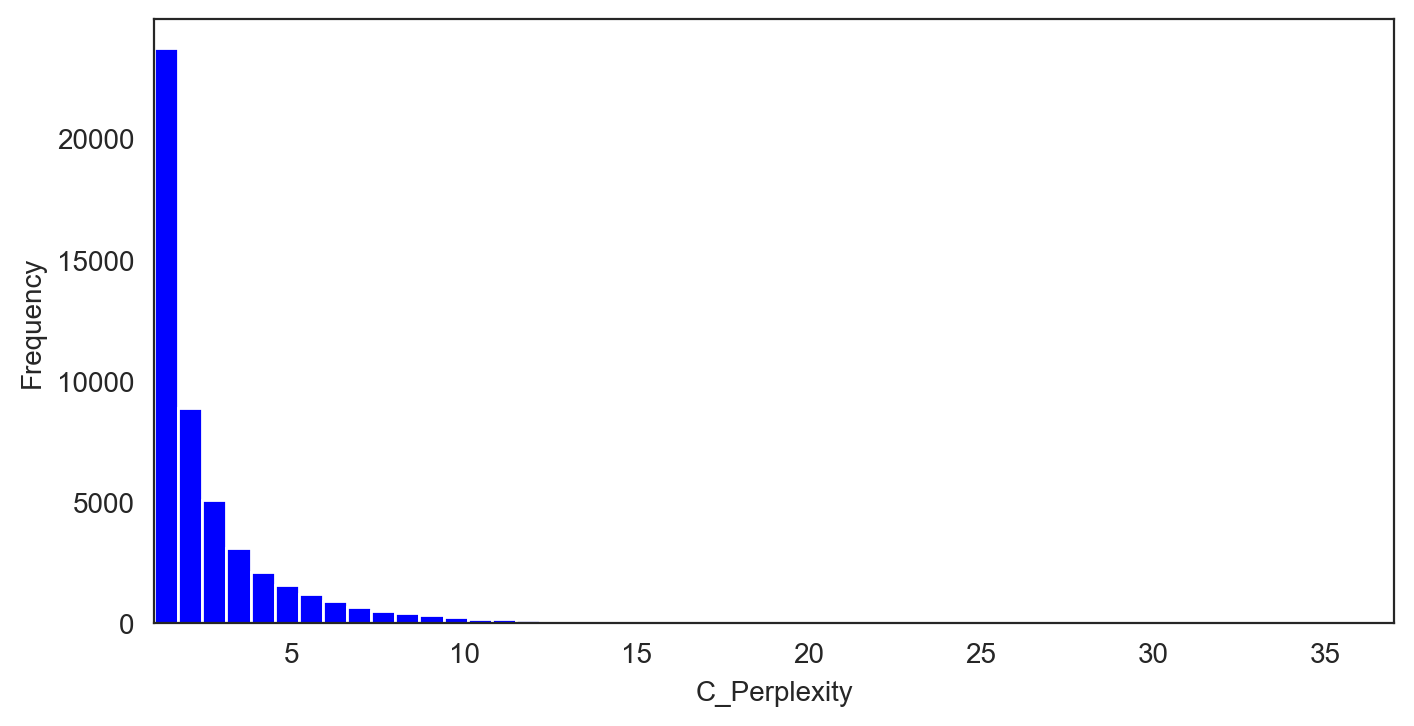

In [16]:
plt.figure(figsize=[8,4],dpi=200)
plt.hist(df['C_PERPLEXITY'],color='b',bins=50)
plt.ylabel('Frequency')
plt.xlabel('C_Perplexity')
plt.xlim([1,np.ceil(np.max(df['C_PERPLEXITY']))])
plt.savefig('img/VAL_C_PERPLEXITY.png',dpi=200)